importing data
<!-- download data= 'https://www.kaggle.com/datasets/hojjatk/mnist-dataset' -->

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import idx2numpy
# dataset='https://www.kaggle.com/datasets/hojjatk/mnist-dataset'

In [29]:
import pandas as pd

# Specify the file paths for the MNIST IDX files
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

# Read the IDX files using idx2numpy
x_train = idx2numpy.convert_from_file(train_images_file)
y_train = idx2numpy.convert_from_file(train_labels_file)
x_test = idx2numpy.convert_from_file(test_images_file)
y_test = idx2numpy.convert_from_file(test_labels_file)

# Reshape the image arrays to 1D arrays (784 pixels)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Create Pandas DataFrames
columns = [f"pixel_{i}" for i in range(x_train_flat.shape[1])]
df_train = pd.DataFrame(data=x_train_flat, columns=columns)
df_test = pd.DataFrame(data=x_test_flat, columns=columns)

# Add the label columns
df_train["label"] = y_train
df_test["label"] = y_test

# Display the first few rows of the DataFrames
# print("Training DataFrame:")
# print(df_train.head())

# print("\nTesting DataFrame:")
# print(df_test.head())
df_train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [36]:
df_train.shape

(60000, 785)

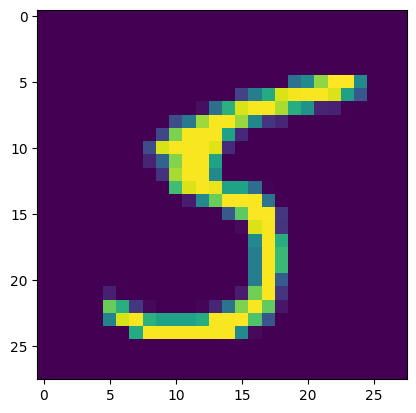

In [40]:
plt.imshow(df_train.iloc[59997,0:784].values.reshape(28,28))

In [57]:
Y_train=df_train['label']
X_train=df_train.drop('label',axis=1)
Y_test=df_test['label']
X_test=df_test.drop('label',axis=1)


KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [58]:
y_pred=knn.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9688

SVM

In [60]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train,Y_train)
# RUN TIME = 3min 27 sec

SVC()

In [62]:
y_pred_svm = svm_classifier.predict(X_test)

# run time = 1min 19 sec

0.9688

In [63]:
accuracy_score(Y_test,y_pred_svm)

0.9792

random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [65]:
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_rf)

0.9705

from the above code we infer that SVM gives the highest accuracy but also highest time complexity and run time 
so we must use feature extraction methods like PCA to remove some features and thereby improving the performance 

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

transformed data (top 100 features )

In [68]:
# pca
pca=PCA(n_components=100)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [72]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_pca,Y_train)
# run time= 1min 33 sec

SVC()

In [74]:
y_pred_svm = svm_classifier.predict(X_test_pca)
accuracy_score(Y_test,y_pred_svm)
# run time = 16 sec

0.9704

model training time improved from 3 min 27 sec --> 1 min 33 sec

prediction time improved from 1 min 22 sec ---> 16 sec